In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_image_data.pickle','rb')
dataset=pickle.load(pickle_in)
pickle_in.close()
dataset=np.array(dataset)
print(dataset.shape)
dataset=dataset/255.0
dataset=np.repeat(dataset,3,-1)
print(dataset.shape)




(10342, 100, 100)
(10342, 100, 300)


In [ ]:
dataset=dataset.reshape((10342,100,100,3))
print(dataset.shape)

(10342, 100, 100, 3)


In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_label.pickle','rb')
label=pickle.load(pickle_in)
pickle_in.close()
label=np.array(label)

print(label.shape)

(10342,)


In [ ]:
IMG_SIZE=[100,100]
incp=InceptionV3(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

for layer in incp.layers:
  layer.trainable=False
x=Flatten()(incp.output)
prediction=Dense(3,activation='softmax')(x)
model = Model(inputs=incp.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 49, 49, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 49, 49, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 49, 49, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
keras.utils.plot_model(model,to_file='/content/drive/My Drive/CLASS Project/InceptionV3.png',show_shapes=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,label,stratify=label,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307,)
(1035,)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307, 3)
(1035, 3)


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
hist=model.fit(X_train,y_train,epochs=20,validation_split=0.1,verbose=1)

Epoch 1/20
262/262 [==============================] - 7s 28ms/step - loss: 8.7651 - accuracy: 0.6656 - val_loss: 28.9125 - val_accuracy: 0.6982
Epoch 2/20
262/262 [==============================] - 6s 22ms/step - loss: 7.3160 - accuracy: 0.6605 - val_loss: 6.0054 - val_accuracy: 0.6391
Epoch 3/20
262/262 [==============================] - 6s 21ms/step - loss: 7.2790 - accuracy: 0.6669 - val_loss: 0.4856 - val_accuracy: 0.6380
Epoch 4/20
262/262 [==============================] - 6s 21ms/step - loss: 7.3713 - accuracy: 0.6688 - val_loss: 8.8155 - val_accuracy: 0.6982
Epoch 5/20
262/262 [==============================] - 6s 22ms/step - loss: 8.7668 - accuracy: 0.6607 - val_loss: 25.8186 - val_accuracy: 0.6391
Epoch 6/20
262/262 [==============================] - 6s 21ms/step - loss: 6.5257 - accuracy: 0.6657 - val_loss: 2.2355 - val_accuracy: 0.6380
Epoch 7/20
262/262 [==============================] - 6s 22ms/step - loss: 7.8248 - accuracy: 0.6634 - val_loss: 14.0785 - val_accuracy: 0.6

In [ ]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 1s 32ms/step - loss: 1.6908 - accuracy: 0.6725


[1.6908432245254517, 0.6724637746810913]

In [ ]:
a=X_test[0]
print(a.shape)
a=np.expand_dims(a,0)

(100, 100, 3)


In [ ]:
print(np.argmax(model.predict(a))+1)

2


In [ ]:
model.save('/content/drive/My Drive/CLASS Project/InceptionV3.h5')

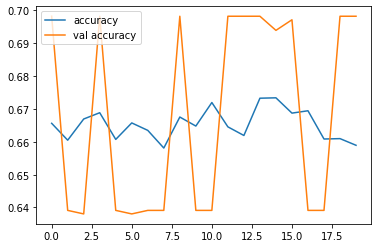

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()

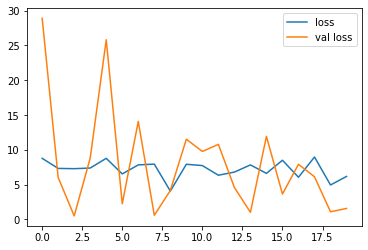

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()